# Name: Abhay Sharma
# Roll No: 22CH10001

# Assignment: 02

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
np.random.seed(42)  # fixing random seed for reproducibility 

knn classifer(without weight)

In [2]:
class KNN_Normal:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = self.z_score_normalization(X_train)
        self.y_train = y_train

    # predicting the test data
    def predict(self, X_test):
        X_test = self.z_score_normalization(X_test)
        distances = self.euclidean_distance(X_test)
        indices = np.argsort(distances, axis=1)[:, :self.k]    # indices of knn for each test data
        nn_labels = self.y_train[indices]
        predictions = []
        for x in nn_labels:
            counts = np.bincount(x)
            most_frequent = counts.argmax()
            predictions.append(most_frequent)
        predictions = np.array(predictions)
        return predictions

    # Calculate euclidean distance
    def euclidean_distance(self, X_test):
        return np.sqrt(np.sum((X_test[:, np.newaxis] - self.X_train) ** 2, axis=2))

    # z score normlaization
    def z_score_normalization(self, data):
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        return (data - mean) / std

knn classifier(weighted)

In [3]:
class KNN_Weighted(KNN_Normal):
    def predict(self, X_test):
        X_test = self.z_score_normalization(X_test)
        distances = self.euclidean_distance(X_test)
        indices = np.argsort(distances, axis=1)[:, :self.k]
        nn_labels = self.y_train[indices]
        weights = 1 / distances[:, :self.k]

        predictions = []
        for i in range(len(X_test)):
            class_weights = np.bincount(nn_labels[i], weights=weights[i])
            predictions.append(class_weights.argmax())

        return np.array(predictions)

Data prepration

In [4]:
dataset = pd.read_csv('Iris.csv')
dataset['Species'] = dataset['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True ,random_state=3)

Experiment-01

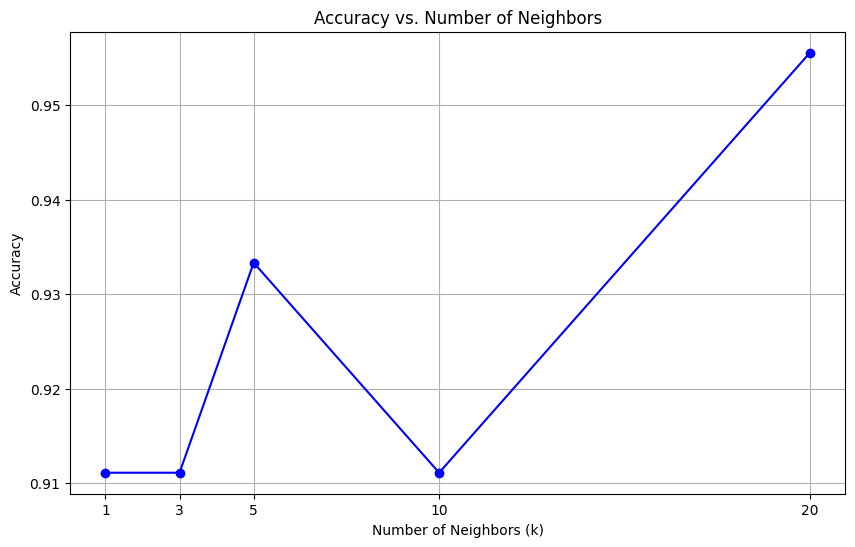

accuracy: 0.956


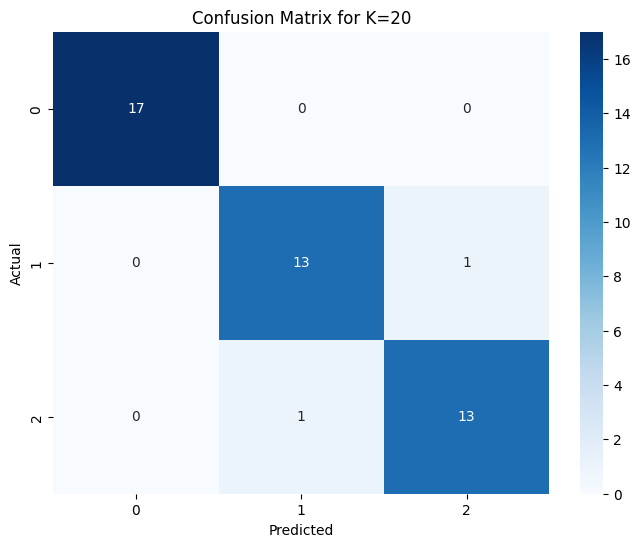

In [6]:
k_values = [1, 3, 5, 10, 20]
accuracy_values = []

for k in k_values:
    knn_classifier = KNN_Normal(k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_values)]
best_knn_classifier = KNN_Normal(best_k)
best_knn_classifier.fit(X_train, y_train)
best_y_pred = best_knn_classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, best_y_pred)
accuracy_normal = accuracy_score(y_test, best_y_pred).round(3)
print(f"accuracy: {accuracy_normal}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for K={best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Experiment 02

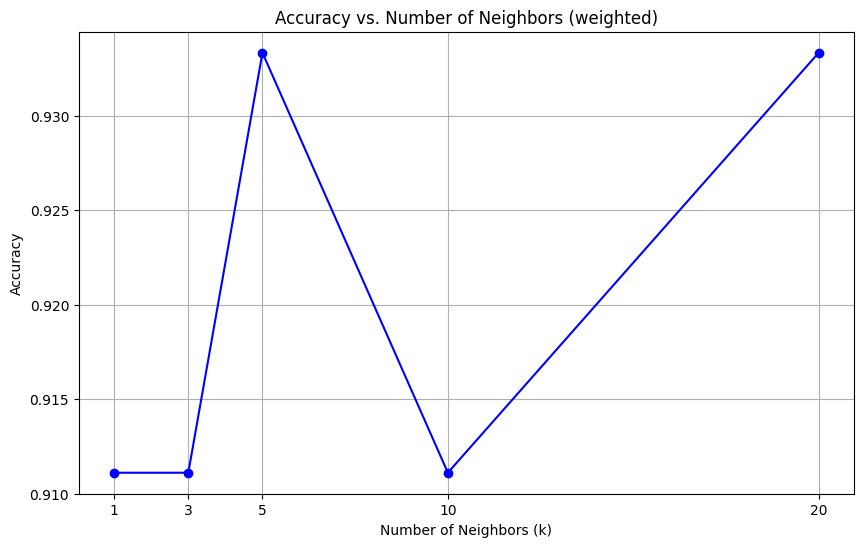

accuracy: 0.933


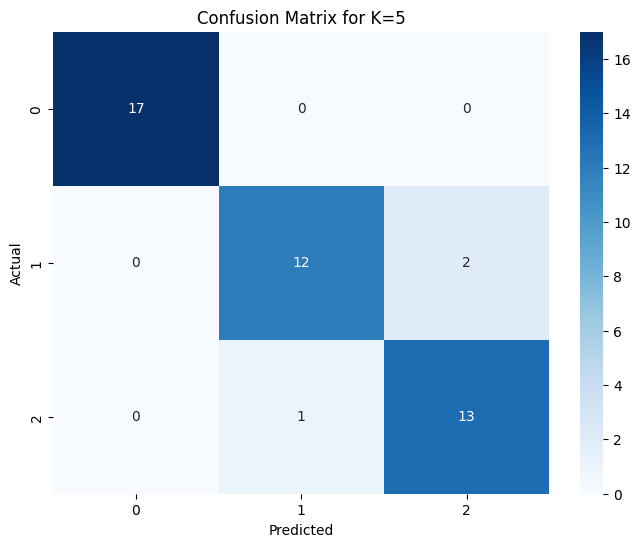

In [7]:
k_values = [1, 3, 5, 10, 20]
accuracy_values = []

for k in k_values:
    knn_classifier = KNN_Weighted(k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (weighted)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
# selecting best k
best_k = k_values[np.argmax(accuracy_values)]
best_knn_classifier = KNN_Weighted(best_k)
best_knn_classifier.fit(X_train, y_train)
best_y_pred = best_knn_classifier.predict(X_test)

accuracy_weighted = accuracy_score(y_test, best_y_pred).round(3)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, best_y_pred)
print(f"accuracy: {accuracy_weighted}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for K={best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Experiment-03

In [8]:
num_noisy_samples = int(0.1 * len(X_train))
noisy_indices = np.random.choice(len(X_train), size=num_noisy_samples, replace=False)
# generating noise
noise = np.random.normal(loc=0, scale=1, size=(num_noisy_samples, X_train.shape[1]))
X_train_noisy = X_train.copy()
# Adding noise
X_train_noisy[noisy_indices] += noise

In [9]:
# Training
knn_normal = KNN_Normal(best_k)
knn_normal.fit(X_train_noisy, y_train)

knn_weighted = KNN_Weighted(best_k)
knn_weighted.fit(X_train_noisy, y_train)

# Predictions
y_pred_normal = knn_normal.predict(X_test)
y_pred_weighted = knn_weighted.predict(X_test)

# Accuracy
accuracy_normal_noisy = accuracy_score(y_test, y_pred_normal).round(3)
accuracy_weighted_noisy = accuracy_score(y_test, y_pred_weighted).round(3)

print(f"accuracy normal: {accuracy_normal_noisy}")
print(f"accuracy weighted: {accuracy_weighted_noisy}")

accuracy normal: 0.911
accuracy weighted: 0.889


In [10]:
print(f"accuracy difference normal: {(accuracy_normal - accuracy_normal_noisy)*100}%")
print(f"accuracy difference weighted: {(accuracy_weighted - accuracy_weighted_noisy)*100}%")

accuracy difference normal: 4.499999999999993%
accuracy difference weighted: 4.400000000000004%


Experiment-04

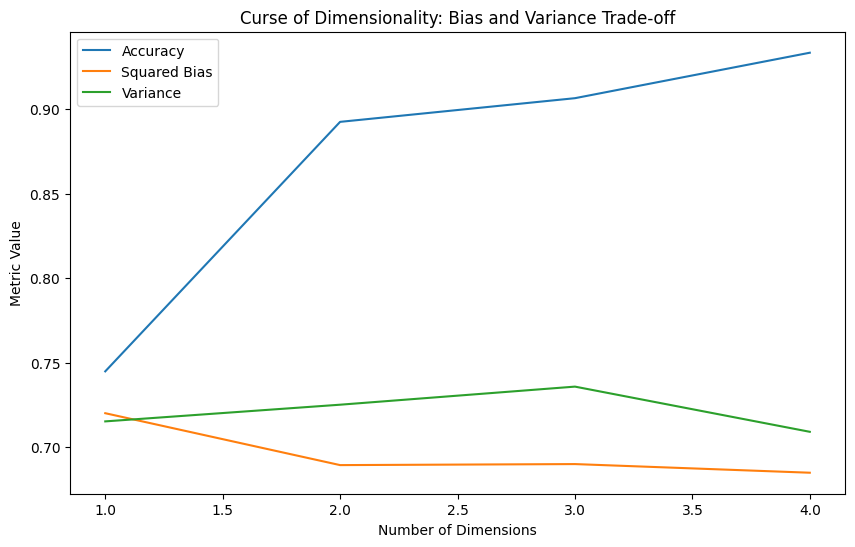

In [11]:
dimensions = range(1, X.shape[1] + 1)

# Lists to store accuracy, bias, and variance
accuracy_list = []
bias_list = []
variance_list = []

# Repeat the experiment multiple times for robustness
num_experiments = 100

for dim in dimensions:
    accuracy_sum = 0
    squared_bias_sum = 0
    variance_sum = 0

    for _ in range(num_experiments):
        # Select a subset of dimensions
        selected_dimensions = np.random.choice(X.shape[1], dim, replace=False)
        X_subset = X[:, selected_dimensions]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, shuffle=True ,random_state=3)

        # Train a KNN classifier
        knn_model = KNN_Normal(best_k)
        knn_model.fit(X_train, y_train)

        # Predict the labels for the testing set
        y_pred = knn_model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_sum += accuracy

        # Calculate bias and variance
        expected_prediction = np.mean(y_pred)
        squared_bias = np.mean((expected_prediction - y_test)**2)
        variance = np.var(y_pred)

        squared_bias_sum += squared_bias
        variance_sum += variance

    # Average accuracy, bias, and variance over experiments
    average_accuracy = accuracy_sum / num_experiments
    average_bias = squared_bias_sum / num_experiments
    average_variance = variance_sum / num_experiments

    accuracy_list.append(average_accuracy)
    bias_list.append(average_bias)
    variance_list.append(average_variance)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracy_list, label='Accuracy')
plt.plot(dimensions, bias_list, label='Squared Bias')
plt.plot(dimensions, variance_list, label='Variance')
plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('Curse of Dimensionality: Bias and Variance Trade-off')
plt.legend()
plt.show()

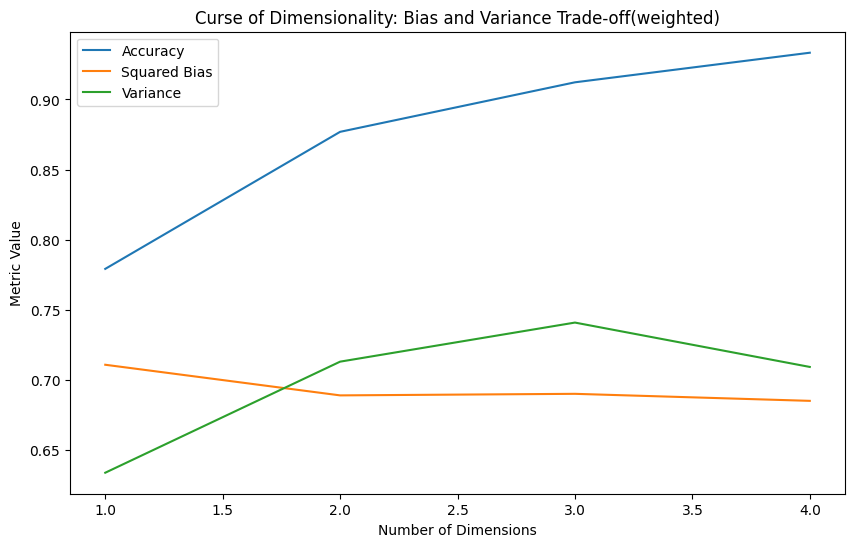

In [12]:
dimensions = range(1, X.shape[1] + 1)

# Lists to store accuracy, bias, and variance
accuracy_list = []
bias_list = []
variance_list = []

# Repeat the experiment multiple times for robustness
num_experiments = 100

for dim in dimensions:
    accuracy_sum = 0
    squared_bias_sum = 0
    variance_sum = 0

    for _ in range(num_experiments):
        # Select a subset of dimensions
        selected_dimensions = np.random.choice(X.shape[1], dim, replace=False)
        X_subset = X[:, selected_dimensions]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, shuffle=True ,random_state=3)

        # Train a KNN classifier
        knn_model = KNN_Weighted(best_k)
        knn_model.fit(X_train, y_train)

        # Predict the labels for the testing set
        y_pred = knn_model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_sum += accuracy

        # Calculate bias and variance
        expected_prediction = np.mean(y_pred)
        squared_bias = np.mean((expected_prediction - y_test)**2)
        variance = np.var(y_pred)

        squared_bias_sum += squared_bias
        variance_sum += variance

    # Average accuracy, bias, and variance over experiments
    average_accuracy = accuracy_sum / num_experiments
    average_bias = squared_bias_sum / num_experiments
    average_variance = variance_sum / num_experiments

    accuracy_list.append(average_accuracy)
    bias_list.append(average_bias)
    variance_list.append(average_variance)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracy_list, label='Accuracy')
plt.plot(dimensions, bias_list, label='Squared Bias')
plt.plot(dimensions, variance_list, label='Variance')
plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('Curse of Dimensionality: Bias and Variance Trade-off(weighted)')
plt.legend()
plt.show()